# Homework week 1: IMDB list

Nhóm mình chỉ có mình chị đi buổi present đợt trước nên c tóm tắt lại 2 ý quan trọng của Kai trong buổi đó nhé: 
1. Bài present phải có 1 câu hỏi chủ đề. Nghĩa là mình đang đi tìm câu trả lời cho câu hỏi nào, problem gì. 
2. Bài present phải có structure mạch lạc & logic. 

Với dataset IMDB này, câu hỏi của bt khá rõ ràng: "In this project, we take IMDB SCORE as response variable and focus on operating predictions by analyzing the rest of variables in the IMDB 5000 movie data. The results can help film companies to understand the secret of generating a COMMERCIAL SUCCESS movie".  
Tuy nhiên chị có 2 remarks ở đây: 
1. "a commercial success movie" : thành công về mặt thương mại nghĩa là tỉ suất lợi nhuận cao so với vốn bỏ ra (doanh thu trừ đi chi phí). Vậy phải focus vào 2 cột budget & gross để tính ra lợi nhuận thương mại. 
2. "IMDB score = response variable": ok dựa vào Imdb để quan sát các yếu tố khác thì cũng được thôi, Imdb là một biến khá bias, tuy nhiên dùng nó để quan sát thì cũng tạm được so với các biến khác trong dataset. 

Theo mạch này, chị đề xuất chủ đề của bài nhóm mình sẽ là "What are the common points of top commercial success movies?" nghĩa là mình sẽ đứng ở góc nhìn của 1 nhà đầu tư, đi tìm điểm chung của các bộ phim thành công về mặt thương mại, từ đó rút ra advise cho investor.

Structure của bài: 
1. Exploring dataset: get to know the dataframe, get a few first observation. 

2. Commercial success metrics: c đề nghị dùng ROI để đo độ success của each movie. Bước này sẽ bổ sung cột ROI của từng movie. 

3. Processing data: gồm 2 phần là Cleaning data (bỏ các row n/a, null, dummies) và Processing dataP (tách các genres ra để observe ở bước sau như Hưng đề xuất, sort ROI descending order, lấy list top_100_success etc...). Tại sao bh mới clean data? vì mình quan sát ROI thôi chứ các yếu tố khác ko quá quan trọng, thiếu 1 2 row cũng đc chị suppose. 

4. Observe data: plot dataframe top_100_success có được ở bước 3 theo nhiều angle khác nhau để soi xem có những điểm chung lớn nào. 

5. Extra: observe top_100_failure, top_100_imdb_score để xem có j đối lập hoàn toàn không?? nếu nó cũng pattern y chang nhóm top_100_success thì chết bà... 

6. Conclusion

## 1. EXPLORING DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.shape

(5043, 28)

In [4]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [5]:
data.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [6]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Observation: 
- nhiều cột type là float64 c cảm thấy ko cần thiết. Tại toàn số lớn triệu triệu ngàn ngàn ko mà để số lẻ thập phân chi ko biết --> round up bọn nó cho thành interger hết được ko hẻ mấy em

Ghi chú:
- “Plot Keywords”—words or phrases that describe motifs, themes, character types, or plot details. Each plot keyword is searchable, so if you wanted a list of, say, every movie where a character gets hit with a hammer, you just need to go to the “Hit With A Hammer” IMDb keyword page.
- aspect_ratio: tỉ lệ màn hình (thông thường tv là 4:3, sau này là 16:9)

In [7]:
data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

Observation: 
- nhìn vào 2 cột gross và budget chỉ có 4159 & 4551 row filled/5043 rows ta biết bảng data này sẽ bị drop khá nhiều đây. Nhưng còn tầm 4000 row cho datafram thì cũng rất ổn rồi.
- why? vì các nhà sản xuất thường giữ kín thông tin chính xác về chi phí & doanh thu vì nó liên quan tới tỉ lệ chia chác của đoàn làm phim nhoé. 

In [8]:
# How many missing value in each column? 
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

Observation: 
- có hơn 5000 bộ phim, nhưng chỉ có 2400 đạo diễn, 2000 diễn viên chính, 3000 dv nhì: cạnh tranh thật khốc liệt ^0^
- đoán: 47 thứ ngôn ngữ nhưng tiếng Anh là chủ đạo, 65 quốc gia nhưng USA là chủ yếu. 
- mấy cột facebook_likes ko biết là lấy số like trước hay sau khi phim ra mắt. Vì sau khi phim ra mắt chắc chắn các profile đều có tăng likes, nên c nghĩ là các thông số này không solid lắm. 
- khi quan sát imdb_score cần chú ý tới num_vote_user và num_user_for_review, vì nhiều fim điểm cao bởi vì có vài chục người vote sẽ ko khách quan bằng phim điểm cao có mười mấy ngàn người vote. 

In [10]:
#these lines below are just for satisfying my curiosity ^^! Hope it help
#1
data['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [11]:
#OMG Vietnamese language??? Which film then? 
data.loc[data['language']=='Vietnamese',['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','country','content_rating','title_year','imdb_score','budget','gross']]

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,country,content_rating,title_year,imdb_score,budget,gross
4463,Journey from the Fall,Ham Tran,Long Nguyen,Kieu Chinh,Cat Ly,Drama,USA,R,2006.0,7.4,1592000.0,638951.0


In [12]:
#2
data['facenumber_in_poster'].unique()

array([ 0.,  1.,  4.,  3.,  2.,  6.,  7.,  5.,  8., nan, 10., 15.,  9.,
       11., 12., 31., 14., 19., 13., 43.])

In [13]:
#3
data['imdb_score'].unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.5, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

In [14]:
#4 
data['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

Giải thích: 
- G – General Audiences - All ages admitted. Nothing that would offend parents for viewing by children.

- PG – Parental Guidance Suggested - Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

- PG-13 – Parents Strongly Cautioned - Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

- R – Restricted - Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

- NC-17 – Adults Only - No One 17 and Under Admitted. Clearly adult. Children are not admitted.
- TV-Y: appropriate for children of all ages. 
- TV-Y7:  designed for chil- dren ages 7 and older
- TV-14: unsuitable for children under the age of 14 
- TV-PG: 
- NC-17: No Children 17 and Under Admitted
- X : explicit films. Films rated X are intended only for viewing by adults, usually defined as people over the age of 18 or 21.
- GP:  All Ages Admitted – Parental Guidance Suggested 
- Unrated: In older movies, unrated means that the picture was made before the MPAA began using the rating system. In new movies, a DVD that says "unrated" means scenes have been added to the film that were not seen in the "rated" version
- Approved, Passed: old rating back in 1930 by MPPC code, mean the movie is approved to release/passed the jury review.

## 2. Adding metrics

Pick a side: pratical investor

What is ROI? https://corporatefinanceinstitute.com/resources/knowledge/finance/return-on-investment-roi-formula/ 

ROI Formula: <chèn ảnh vào cũng đc nhé, cho nó phong phú bài làm>


In [15]:
#Add ROI column to dataframe, calculate ROI of each movie
data['ROI (%)']=round((data['gross']-data['budget'])/data['budget']*100)
data2=data.sort_values(by='ROI (%)', ascending=False)
data2=data2.round(2)
data2.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI (%)
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,719349.0
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,271466.0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,234117.0


In [16]:
#adding comma to ROI values - error vi co cot N/a
#top_ROI['ROI (%)'] = top_ROI['ROI (%)'].astype(int).apply(lambda x: "{:,}".format(x)) 

In [17]:
#scatter plot xem phan bo cua ROI & budget ntn 
#plt.figure(figsize=(20,15))
#sns.scatterplot(x="ROI (%)", y='movie_title',data=top_ROI, color='g',legend = False)


## 3. Processing data

3.1 Cleaning data

- Remove all rows that has n/a ROI. 

In [18]:
drop_columns=['color','facenumber_in_poster','plot_keywords','movie_imdb_link','aspect_ratio','movie_facebook_likes','actor_2_facebook_likes','cast_total_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes','director_facebook_likes']
data2.drop(drop_columns,inplace=True, axis=1)
data2.head(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,ROI (%)
4793,Oren Peli,409.0,84.0,Ashley Palmer,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,Amber Armstrong,1189.0,English,USA,R,15000.0,2007.0,6.3,719349.0
4799,Jonathan Caouette,72.0,88.0,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,5709,Renee Leblanc,114.0,English,USA,Unrated,218.0,2003.0,7.2,271466.0
4707,Daniel Myrick,360.0,81.0,Joshua Leonard,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,Michael C. Williams,3400.0,English,USA,R,60000.0,1999.0,6.4,234117.0
4984,Edward Burns,36.0,98.0,Michael McGlone,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,6375,Maxine Bahns,36.0,English,USA,R,25000.0,1995.0,6.6,40886.0
4936,Tobe Hooper,277.0,88.0,Edwin Neal,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96411,Marilyn Burns,826.0,English,USA,R,83532.0,1974.0,7.5,36843.0
3278,Tobe Hooper,277.0,88.0,Edwin Neal,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,Marilyn Burns,826.0,English,USA,R,83532.0,1974.0,7.5,36843.0
5035,Robert Rodriguez,56.0,81.0,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,Consuelo Gómez,130.0,Spanish,USA,R,7000.0,1992.0,6.9,29056.0
4956,Travis Cluff,159.0,81.0,Cassidy Gifford,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,Reese Mishler,150.0,English,USA,R,100000.0,2015.0,4.2,22658.0
4977,Morgan Spurlock,193.0,100.0,Amanda Kearsan,11529368.0,Comedy|Documentary|Drama,Chemeeka Walker,Super Size Me,85028,Amelia Giancarlo,404.0,English,USA,PG,65000.0,2004.0,7.3,17637.0
4821,John Carpenter,318.0,101.0,Donald Pleasence,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,P.J. Soles,1191.0,English,USA,R,300000.0,1978.0,7.9,15567.0


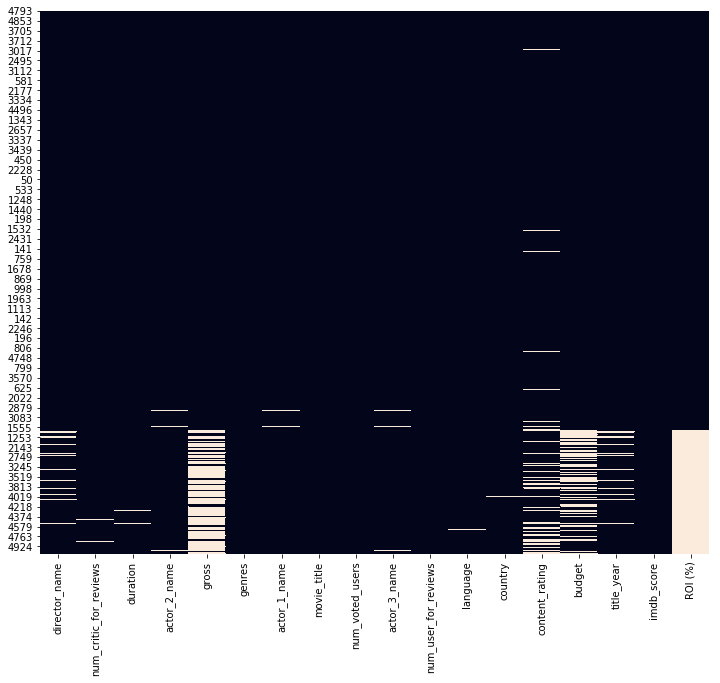

In [29]:
# Visualize missing data
plt.figure(figsize=(12,10))
sns.heatmap(data2.isnull(), cbar=False)

In [19]:
# Quan sát bằng variable ROI thì xem xem cột này có các values nào, có NA hay ko:
data2['ROI (%)'].unique()

array([ 7.19349e+05,  2.71466e+05,  2.34117e+05,  4.08860e+04,
        3.68430e+04,  2.90560e+04,  2.26580e+04,  1.76370e+04,
        1.55670e+04,  1.47010e+04,  1.21120e+04,  1.13260e+04,
        1.10350e+04,  1.00750e+04,  9.14600e+03,  7.81100e+03,
        7.64700e+03,  6.63800e+03,  6.59000e+03,  6.00000e+03,
        5.96800e+03,  5.26200e+03,  5.23700e+03,  5.22500e+03,
        5.14300e+03,  5.12900e+03,  4.89500e+03,  4.72900e+03,
        4.70300e+03,  4.62000e+03,  4.49600e+03,  4.09100e+03,
        4.09000e+03,  4.04200e+03,  3.97900e+03,  3.86600e+03,
        3.49900e+03,  3.30000e+03,  3.25100e+03,  3.15000e+03,
        3.14200e+03,  3.05400e+03,  2.98200e+03,  2.93600e+03,
        2.92300e+03,  2.92200e+03,  2.90000e+03,  2.80200e+03,
        2.72500e+03,  2.65000e+03,  2.62000e+03,  2.53800e+03,
        2.45700e+03,  2.44500e+03,  2.35100e+03,  2.28300e+03,
        2.28100e+03,  2.27200e+03,  2.19900e+03,  2.17700e+03,
        2.15300e+03,  2.14700e+03,  2.11700e+03,  2.076

Oh yeah NaN value đã xuất hiện!! 

In [20]:
# Làm sạch NaN value: trước hết, đổi NaN thành empty row để dropna sau. 
empty=data2.replace('nan','')
data3= empty.dropna(subset=['ROI (%)'])
data3.head()
data3.shape

(3891, 18)

Sau khi clean N/a xong, ta còn 3891 dòng để analyze, ko tệ! 

- Verify duplicate row & dummies data (hàm get_dummies) -- remove rows if it affects to the ROI value

In [21]:
#Check if there is duplicated row
duplicate = data3[data3.duplicated()]
duplicate.head(10)
duplicate.shape

(35, 18)

In [22]:
#Delete dupplicated row
data3.drop_duplicates(subset=None, keep='first', inplace=True)
data3.shape 

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3856, 18)

3891-35 dòng dupplicate = 3856. Phew! 

In [23]:
data3.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
content_rating            51
budget                     0
title_year                 0
imdb_score                 0
ROI (%)                    0
dtype: int64

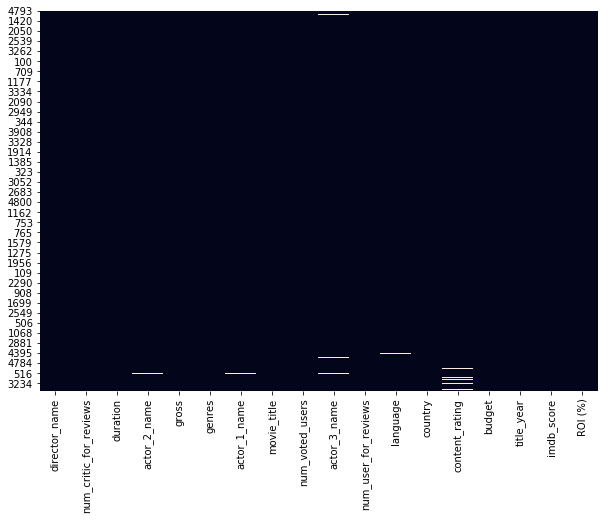

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data3.isnull(), cbar=False)

---> Bảng data ver3 này nhìn đã sạch sẽ hơn rồi. Tuy nhiên còn cần kiểm tra xem có data nào kì lạ (outlier) ko.

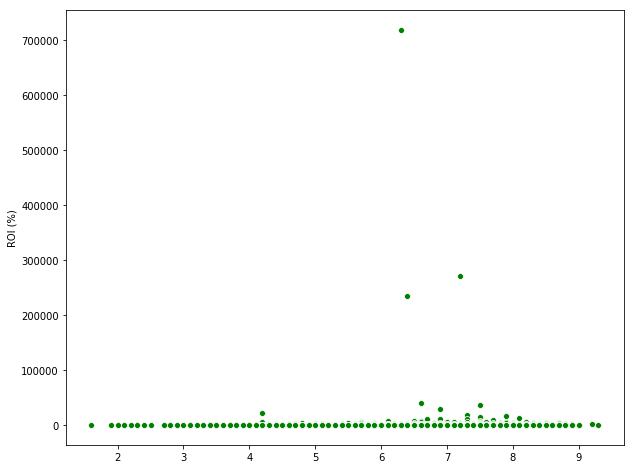

In [25]:
# Check outlier:
plt.figure(figsize=(10,8))
#sns.scatterplot(x="ROI (%)", y='movie_title',data=top_ROI, color='g',legend = False)
#y= data4['movie_title']
x= list(data3['imdb_score'])
sns.scatterplot(x,y= data3['ROI (%)'],data=data3, color='g',legend = False)

--> Có 3 chấm xa quá xa so với toàn bộ phân bố của dữ liệu còn lại: xem lại dataframe để xác định xem các dữ liệu này có thực sự hợp lí hay ko để quyết định bỏ đi hoặc vẫn giữ lại. 

- Round up float64 number to interger ???

- Sort this new dataframe in descending order--> Take top_100_success as the new dataframe to work with. 

- Also take top_100_failures dataframe, - top_100_imdb dataframe for the Extra part to verify our hypotheses. 

!!! Chú ý khi làm data top_100_imdb: chỉ lấy những fim có lượng vote lớn do lượng vote nhỏ quá sẽ không được khách quan. 

3.2 Processing data

- tách genre ra
- phân thành group để khi visualize lên có các màu khác nhau.
- other ideas?


## 4. Visualization & observation

- Plot this "top100" in different angles to see if any interesting thing appear.
- Try to do simple charts to have a better understanding for audience. ( Last time team chị làm được mấy cái buble chart đẹp quá trời đẹp nhưng bị comment là hơi phức tạp - nếu present cho vd như CEO chẳng hạn thì vô nghĩa. Anw trong lớp thì được phép làm thoải mái, nhưng khi present phải dành time để giải thích chart kĩ càng cho mn hiểu. )

- Maybe we even need to dig down more information that aren't in the dataframe to see a pattern. Lets discuss this on saturday

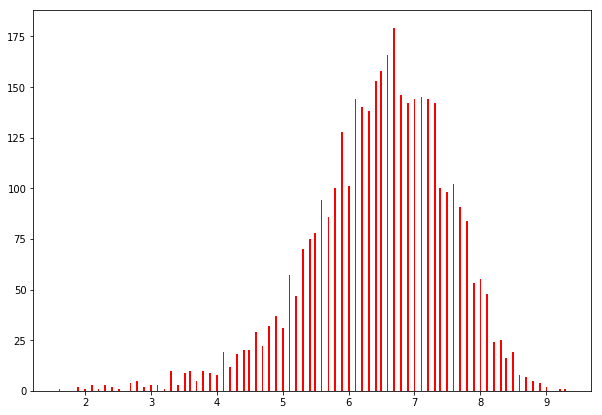

In [26]:
# Imdb score 
data4=data3.sort_values(by='imdb_score',ascending=False) #sorting first
plt.figure(figsize=(10,7))
plt.hist(data4['imdb_score'],bins=300, color='red')
plt.show()

In [27]:
print('IMDB median =', data4['imdb_score'].median())
print('IMDB mean =', round(data4['imdb_score'].mean(), 2))
print('IMDB mode =', data4['imdb_score'].mode())
print('IMDB min =', data4['imdb_score'].min())
print('IMDB max =', data4['imdb_score'].max())

IMDB median = 6.6
IMDB mean = 6.46
IMDB mode = 0    6.7
dtype: float64
IMDB min = 1.6
IMDB max = 9.3


Does it mean that we have some..outliers here? =____=

In [28]:
#plt.figure(figsize=(20,15))
#sns.scatterplot(x="ROI (%)", y='movie_title',data=top_ROI, color='g',legend = False)
#y= data4['movie_title']
#x= list(data4['imdb_score'])

#sns.scatterplot(x,y=data4['budget'],data=data4, color='g',legend = False)

## 5. Extra


Verify if the same observation of top_100_success happen in top_100_failures & top_100_imdb or not

# 6. Conclusion